In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

happines_data = pd.read_csv('all.csv', parse_dates=True, encoding = "cp1252")
happines_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [2]:
data = happines_data[['GDP per capita','Healthy life expectancy']]

Score:  0.36099093014980915


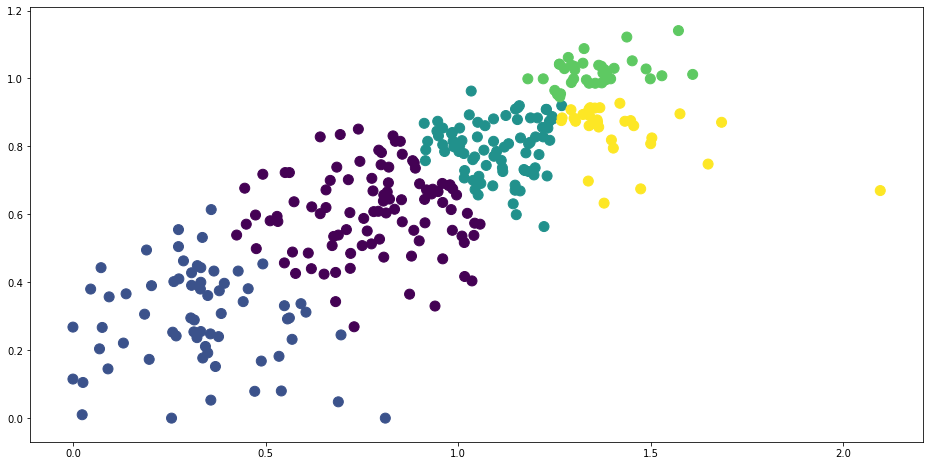

In [60]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=5,
                        assign_labels="discretize",
                        affinity='nearest_neighbors',
                        n_jobs=-1,
                        random_state=9)

sc.fit_predict(data)

from sklearn.metrics import silhouette_score
score = silhouette_score(data, sc.labels_)
print("Score: ", score)

plt.figure(figsize=(16, 8))
plt.scatter(data['GDP per capita'], data['Healthy life expectancy'], c=sc.labels_, s=100)

In [51]:
sc.get_params()

{'affinity': 'nearest_neighbors',
 'assign_labels': 'discretize',
 'coef0': 1,
 'degree': 3,
 'eigen_solver': None,
 'eigen_tol': 0.0,
 'gamma': 1.0,
 'kernel_params': None,
 'n_clusters': 5,
 'n_components': None,
 'n_init': 10,
 'n_jobs': -1,
 'n_neighbors': 10,
 'random_state': 0}

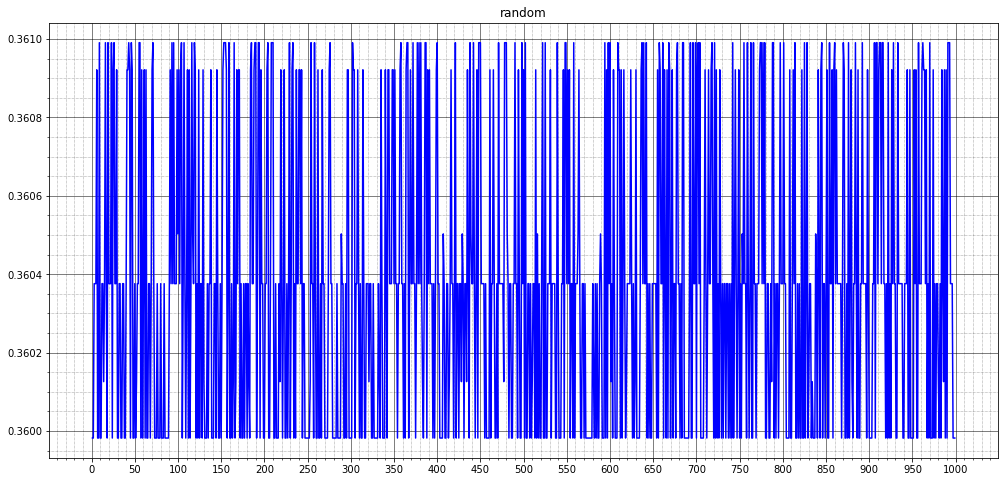

In [58]:
random = np.arange(1, 1000, 1)
results = []

for feature in random:
    rf = SpectralClustering(n_clusters=5, assign_labels="discretize", affinity='nearest_neighbors', random_state=feature)
    rf.fit_predict(data)
        
    results.append(silhouette_score(data, rf.labels_))

fig, ax = plt.subplots(figsize=(17,8)) 
plt.plot(random, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.title('random')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50))

In [59]:
print(results[results.index(max(results))])
print(random[results.index(max(results))])

0.36099093014980915
9
